In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

# Reading  in Data
gdp_file = ('gdp-per-capita-maddison-2020.csv')
gini_file = ('economic-inequality-gini-index.csv')

gdp_df = pd.read_csv(gdp_file)
gini_df = pd.read_csv(gini_file)



# Merging DataFrames
df = pd.merge(gini_df, gdp_df, on =['Entity', 'Code' , 'Year'])
df.drop(columns=['Code','417485-annotations', ], inplace = True)
df.columns = ['Country', 'Year', 'Gini', 'GDP']
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#df.corr()
df.head()
     


,Country,Year,Gini,GDP
0,Albania,1996-01-01,0.270103,3965.685303
1,Albania,2002-01-01,0.317390,5608.962402
2,Albania,2005-01-01,0.305957,6858.466797
3,Albania,2008-01-01,0.299847,8522.129883
4,Albania,2012-01-01,0.289605,9592.000000


In [33]:
group_df = df.groupby('Country')

corr = group_df[['Gini','GDP']].corr().iloc[0::2,-1]
new_df = pd.merge(df, corr, on = 'Country')
new_df.columns = ['Country', 'Year', 'Gini', 'GDP','pearson']


new_df
     

,Country,Year,Gini,GDP,pearson
0,Albania,1996-01-01,0.270103,3965.685303,0.567214
1,Albania,2002-01-01,0.317390,5608.962402,0.567214
2,Albania,2005-01-01,0.305957,6858.466797,0.567214
3,Albania,2008-01-01,0.299847,8522.129883,0.567214
4,Albania,2012-01-01,0.289605,9592.000000,0.567214
...,...,...,...,...,...
1805,Zambia,2006-01-01,0.546175,2133.593994,0.392477
1806,Zambia,2010-01-01,0.556215,3032.067871,0.392477
1807,Zambia,2015-01-01,0.571361,3478.000000,0.392477
1808,Zimbabwe,2011-01-01,0.431536,1515.000000,1.000000


In [26]:
avg_gdp = group_df['GDP'].mean()
avg_gini = group_df['Gini'].mean()
df1 = pd.merge(avg_gini, avg_gdp, on = 'Country')

pearson



Gini   -0.457807
Name: GDP, dtype: float64

In [30]:

time_df = df.groupby('Year')

correlation = time_df[['Gini','GDP']].corr().iloc[0::2,-1]
df2 = pd.merge(df, correlation, on = 'Year')
df2.columns = ['Country', 'Year', 'Gini', 'GDP','Pearson']

df2

,Country,Year,Gini,GDP,Pearson
0,Albania,1996-01-01,0.270103,3965.685303,-0.247666
1,Armenia,1996-01-01,0.444186,4811.489258,-0.247666
2,Brazil,1996-01-01,0.598889,9124.515625,-0.247666
3,Cameroon,1996-01-01,0.444468,1710.105957,-0.247666
4,Chile,1996-01-01,0.548737,14433.319336,-0.247666
...,...,...,...,...,...
1805,Spain,1980-01-01,0.344835,14008.000000,-1.000000
1806,Sweden,1967-01-01,0.339739,17883.000000,NaN
1807,United Kingdom,1969-01-01,0.336724,16820.000000,NaN
1808,United Kingdom,1974-01-01,0.299772,18903.000000,1.000000


In [59]:
df_gdp_gini = df2[['Country','Gini', 'GDP','Pearson']]
df_gdp_gini

,Country,Gini,GDP,Pearson
0,Albania,0.270103,3965.685303,-0.247666
1,Armenia,0.444186,4811.489258,-0.247666
2,Brazil,0.598889,9124.515625,-0.247666
3,Cameroon,0.444468,1710.105957,-0.247666
4,Chile,0.548737,14433.319336,-0.247666
...,...,...,...,...
1805,Spain,0.344835,14008.000000,-1.000000
1806,Sweden,0.339739,17883.000000,NaN
1807,United Kingdom,0.336724,16820.000000,NaN
1808,United Kingdom,0.299772,18903.000000,1.000000


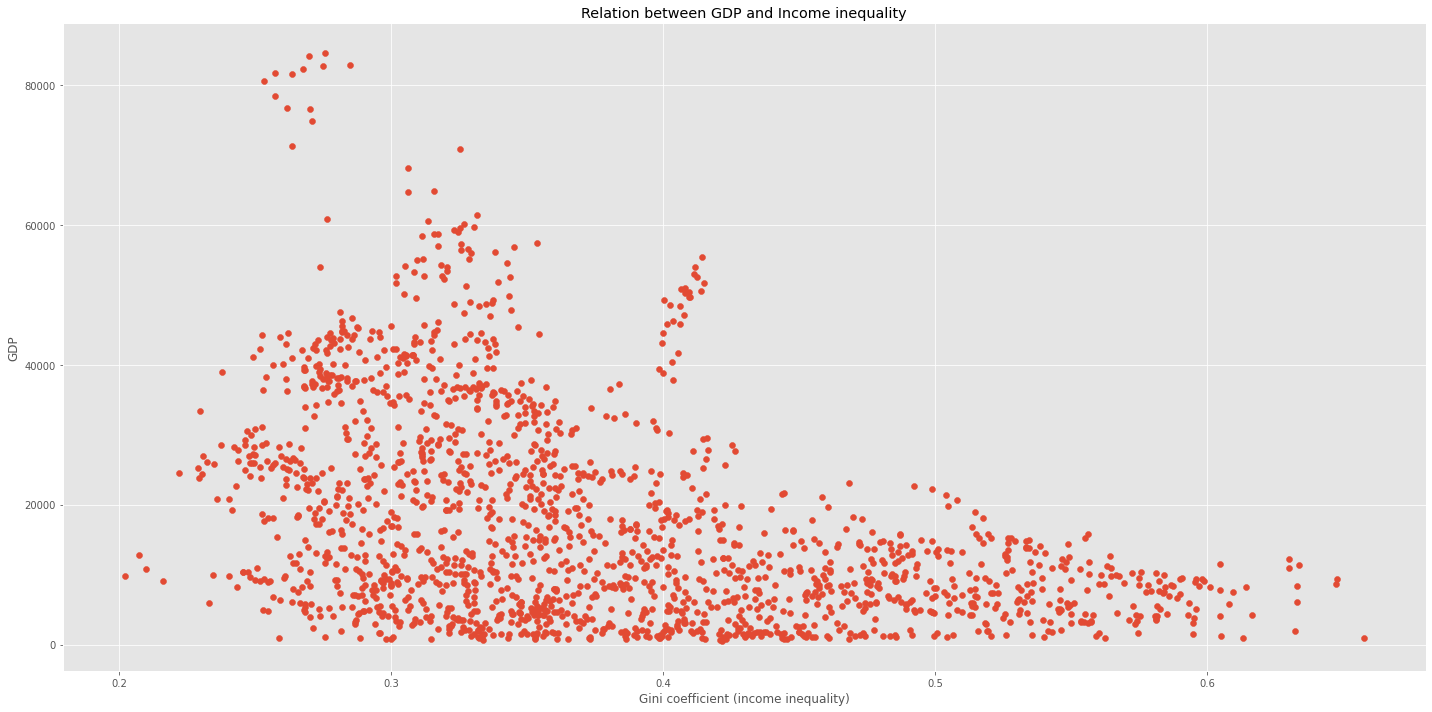

In [64]:
plt.style.use('ggplot')

gdp = df_gdp_gini['GDP']
gini = df_gdp_gini['Gini']



y = df_gdp_gini['GDP']
x = df_gdp_gini['Gini']

plt.figure(figsize=(20,10))
plt.scatter(x, y);
plt.ylabel('GDP')
plt.xlabel('Gini coefficient (income inequality)')
plt.title('Relation between GDP and Income inequality')
plt.tight_layout()


plt.show()


# Is there a relation between a country's Gross Domestict Product (GDP) and its income inequality?

The linear regressions suggest that there is an negative trend which implies there is a negative relation between GDP and the GINI coefficient.

But in the table above you can see that this is not the case with each country. The data shows that with western countries we overall have a more postive coefficient. And with the less economicly developed countries a negative. This could be the af different causes. One possibly being more corruption, political instability or diffent economic sytems. 